# Data Analysis

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from scipy import sparse, stats
from scipy.linalg import svd
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import (KFold, StratifiedKFold, cross_val_score,
                                     cross_validate, train_test_split)
from tqdm import tqdm

In [44]:
sns.set()

In [26]:
TRAIN_PATH = 'train/'
TEST_PATH = 'test/'

In [103]:
X1 = pd.read_csv(TRAIN_PATH + 'X1.csv')
X2 = pd.read_csv(TRAIN_PATH + 'X2.csv')
X3 = pd.read_csv(TRAIN_PATH + 'X3.csv')

Y = pd.read_csv(TRAIN_PATH + 'Y.csv')

In [104]:
X1_test = pd.read_csv(TEST_PATH + 'X1.csv')
X2_test = pd.read_csv(TEST_PATH + 'X2.csv')
X3_test = pd.read_csv(TEST_PATH + 'X3.csv')

In [105]:
X1.shape, X2.shape, X3.shape

((4000, 26), (462888, 2), (4000, 453))

In [106]:
X1.head()

,id,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,1,-1.0,-1.0,107.0,255.0,537.0,10.0,41.0,0.0,...,0,0,0,0,0,0,1,0,1,0
1,5,0,0.0,0.0,20.0,0.0,188.0,1.0,25.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,0.0,0.0,158.0,155.0,3092.0,3.0,218.0,29.0,...,0,0,0,0,0,0,0,1,0,0
3,8,1,0.0,0.0,102.0,343.0,341.0,0.0,24.0,2.0,...,0,0,0,0,0,0,1,0,0,0
4,10,1,0.0,0.0,1.0,1.0,33.0,0.0,41.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [548]:
X2.head()

,id,A
0,3,5
1,3,70340
2,3,72868
3,3,73471
4,3,74998


In [123]:
X3.head()

,id,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
0,3,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.022222,0.0,0.0,0.0,0.000000
1,5,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.029703,0.0,0.0,0.0,0.000000
2,6,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.222222,0.0,0.0,0.0,0.111111
3,8,0.0,0.0,0.02,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.02,0.0,0.0,0.060000,0.0,0.0,0.0,0.000000
4,10,0.0,0.0,0.00,0.0,0.055556,0.055556,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


## Means and standart deviations for X1.

Means for all features in X1.

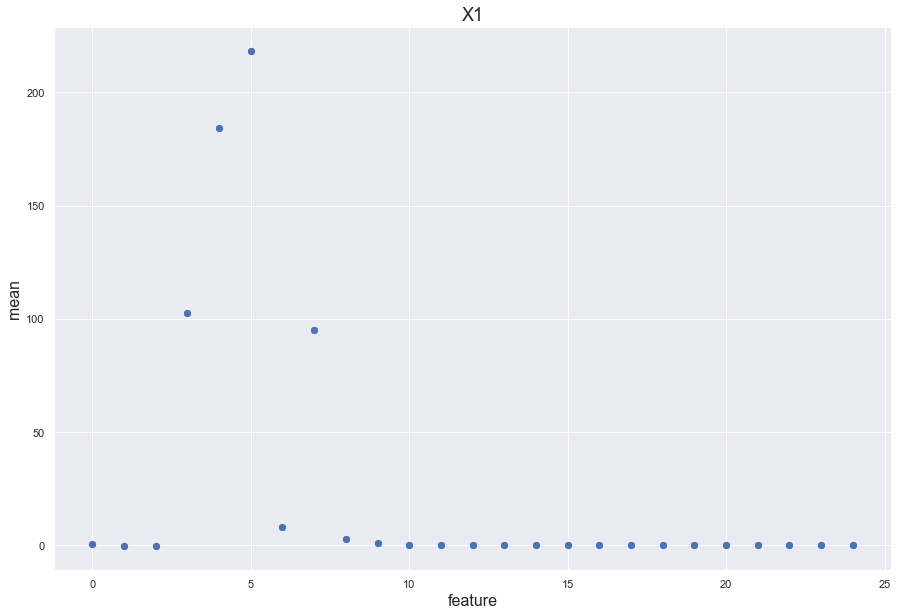

In [564]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(np.arange(len(X1.iloc[:, 1:].columns)), X1.iloc[:, 1:].mean(), s=70, ax=ax)
ax.set_xlabel('feature', fontsize=16)
ax.set_ylabel('mean', fontsize=16)
ax.set_title("X1", fontsize=18)

plt.savefig('x1_mean.png', bbox_inches='tight')

Means for all non-float features in X1.

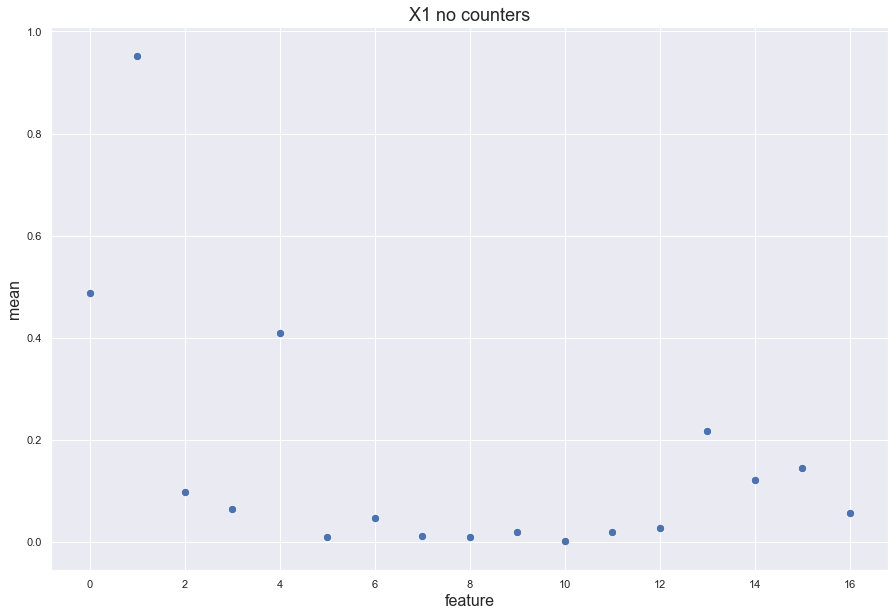

In [565]:
X1_cat = X1[X1.columns[X1.dtypes != 'float64']]

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(np.arange(len(X1_cat.iloc[:, 1:].columns)), X1_cat.iloc[:, 1:].mean(), s=70, ax=ax)
ax.set_xlabel('feature', fontsize=16)
ax.set_ylabel('mean', fontsize=16)
ax.set_title("X1 no counters", fontsize=18)

plt.savefig('x1_mean_no_counters.png', bbox_inches='tight')

Std's for all features in X1.

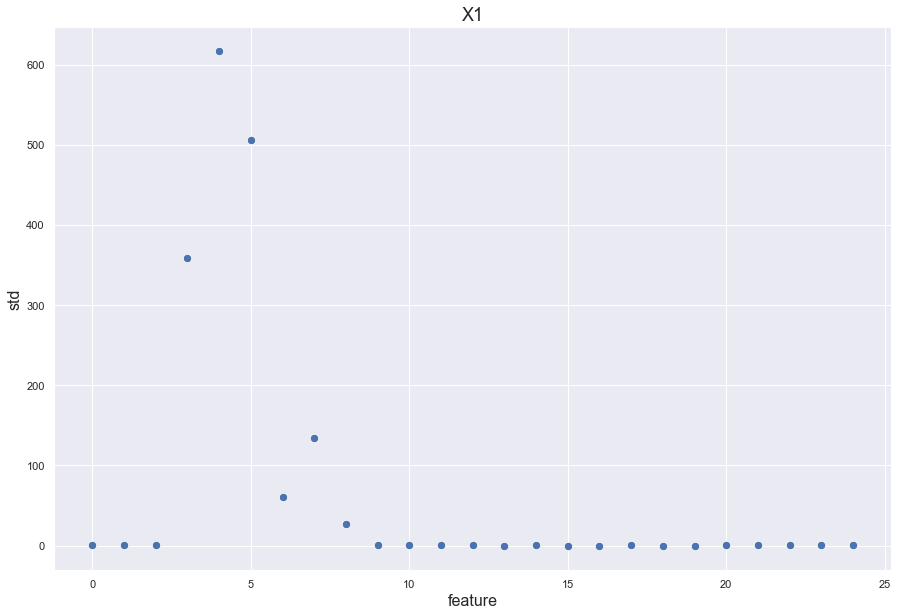

In [566]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(np.arange(len(X1.iloc[:, 1:].columns)), X1.iloc[:, 1:].std(), s=70, ax=ax)
ax.set_xlabel('feature', fontsize=16)
ax.set_ylabel('std', fontsize=16)

ax.set_title("X1", fontsize=18)
plt.savefig('x1_std.png', bbox_inches='tight')

Std's for all non-float features in X1.

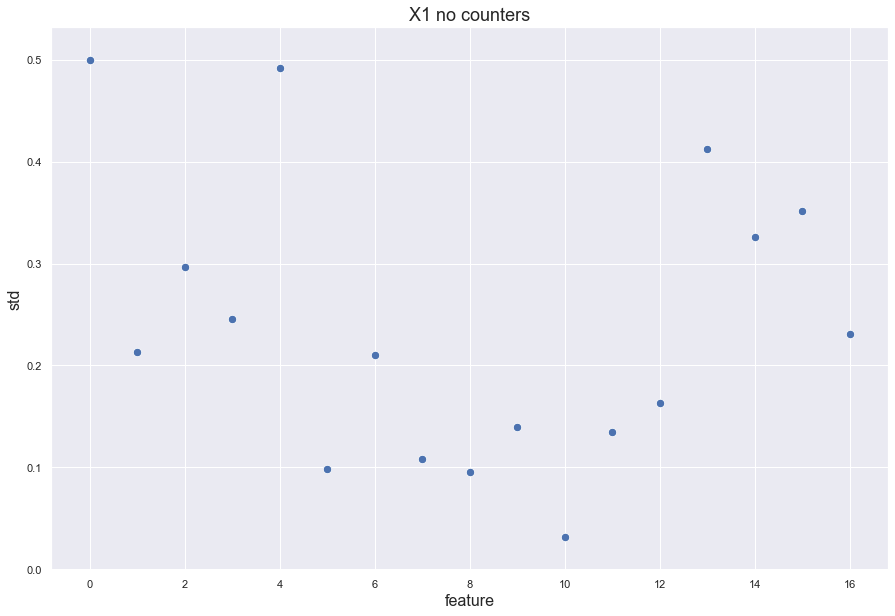

In [567]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(np.arange(len(X1_cat.iloc[:, 1:].columns)), X1_cat.iloc[:, 1:].std(), s=70, ax=ax)
ax.set_xlabel('feature', fontsize=16)
ax.set_ylabel('std', fontsize=16)

ax.set_title("X1 no counters", fontsize=18)
plt.savefig('x1_std_no_counters.png', bbox_inches='tight')

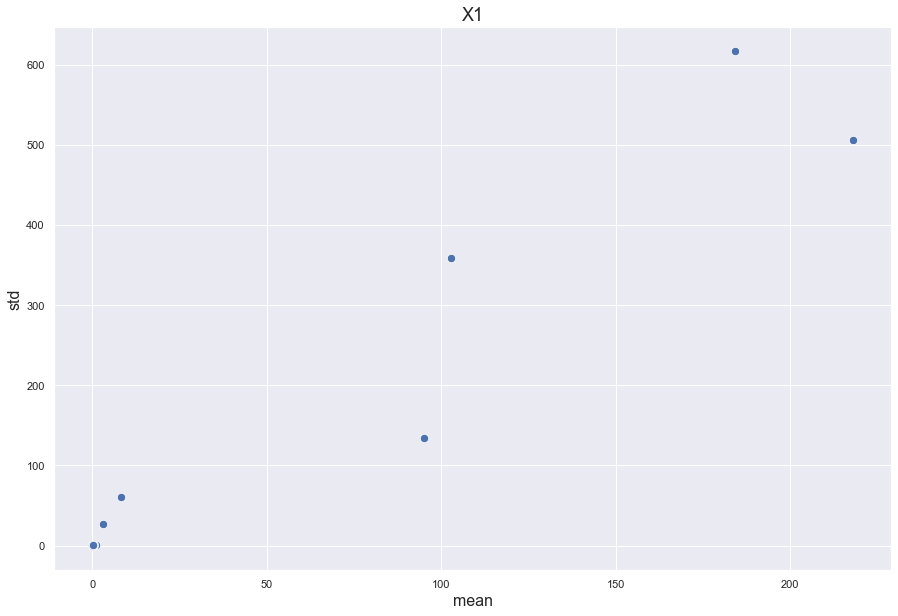

In [568]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(X1.iloc[:, 1:].mean(), X1.iloc[:, 1:].std(), s=70, ax=ax)
ax.set_xlabel('mean', fontsize=16)
ax.set_ylabel('std', fontsize=16)

ax.set_title("X1", fontsize=18)
plt.savefig('x1_mean_std.png', bbox_inches='tight')

Mean-std plot for categorical variables.

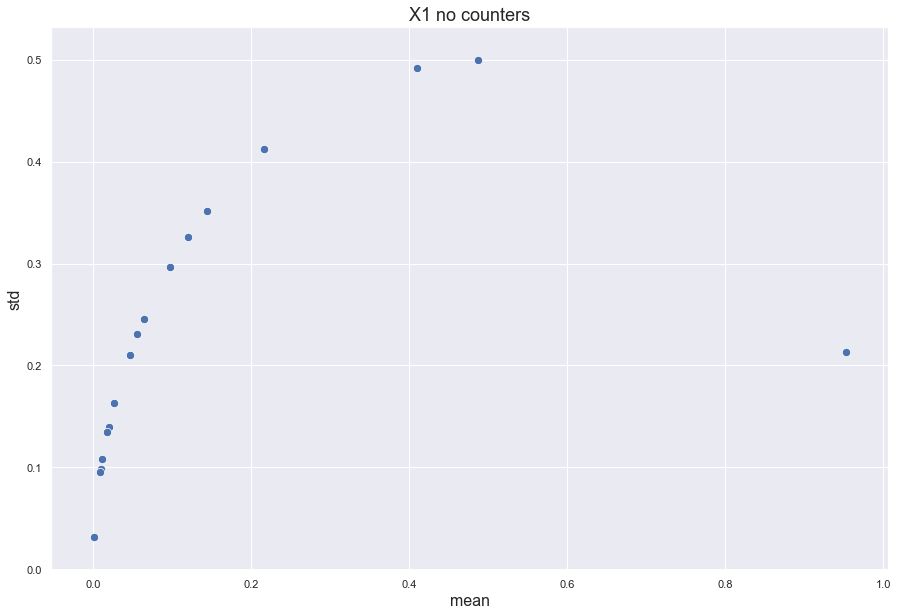

In [569]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(X1_cat.iloc[:, 1:].mean(), X1_cat.iloc[:, 1:].std(), s=70, ax=ax)
ax.set_xlabel('mean', fontsize=16)
ax.set_ylabel('std', fontsize=16)

ax.set_title("X1 no counters", fontsize=18)
plt.savefig('x1_mean_std_no_counters.png', bbox_inches='tight')

These features are binary!

## Histograms and unique values for non-binary features.

In [121]:
for column in X1.columns:
    if X1[column].dtype == 'float64':
        X1_tmp = X1[column]
        if X1[column].nunique() < 8:
            unique_val, counts = np.unique(X1[column], return_counts=True)
        else:
            unique_val, counts = np.unique(X1[column], return_counts=True)
            unique_val, counts = unique_val[np.argsort(counts)[::-1]][:8], np.sort(counts)[::-1][:8]
        print(("'{}' {:5} {:3} {:5} {:8.3f} {:8.3f} {} {}".format(column, X1[column].nunique(), X1[column].min().astype(np.int),
                                                              X1[column].max().astype(np.int), X1[column].mean(), X1[column].std(),
                                                              unique_val.astype(np.int), counts)))

'2'     5  -2     2   -0.038    0.412 [-2 -1  0  1  2] [  97  109 3662  113   19]
'3'     5  -2     2   -0.020    0.306 [-2 -1  0  1  2] [  52   64 3803   73    8]
'4'   531   0  9967  102.645  359.097 [0 1 2 3 4 5 6 7] [549 277 198 152 130 125  97  86]
'5'   721   0 10000  184.296  616.335 [ 0  1  2  3  4  5  9 10] [2061   92   59   38   33   30   20   19]
'6'   677   0 10000  218.048  505.995 [ 0 73 68 69 48 35 41 47] [35 28 28 27 25 25 25 25]
'7'   115   0  1989    8.085   60.907 [0 1 2 3 4 5 6 7] [1656  691  423  253  185  115   98   77]
'8'   452   0  2409   95.189  133.882 [ 2  3 11  1  9  5  0  8] [62 59 57 56 51 50 49 48]
'9'    52   0  1396    2.919   27.434 [0 1 2 3 4 5 6 7] [1876  836  351  238  137  108   87   63]


## Mean and standart deviations for X2.

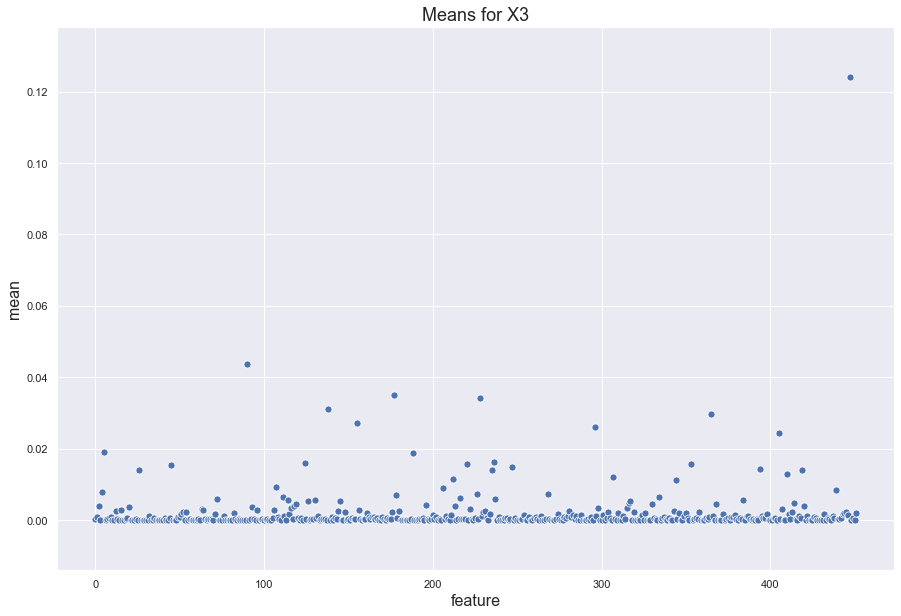

In [573]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(np.arange(len(X3.iloc[:, 1:].columns)), X3.iloc[:, 1:].mean(), s=50, ax=ax)
ax.set_xlabel('feature', fontsize=16)
ax.set_ylabel('mean', fontsize=16)
ax.set_title("Means for X3", fontsize=18)

plt.savefig('x3_mean.png', bbox_inches='tight')

In [574]:
X3.drop('id', axis='columns').mean().argmax()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'448'

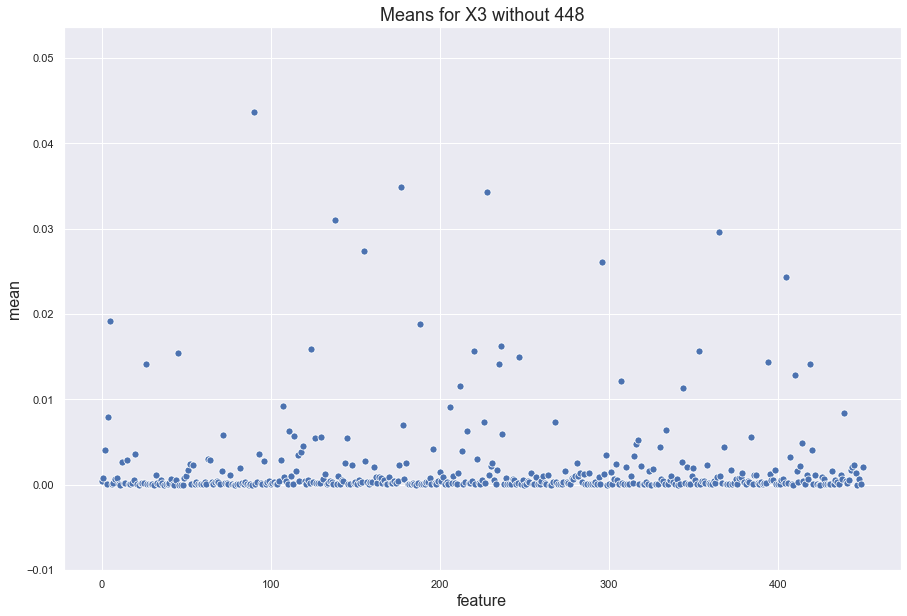

In [575]:
X3_no448 = X3.drop('448', axis='columns')

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(np.arange(len(X3_no448.iloc[:, 1:].columns)), X3_no448.iloc[:, 1:].mean(), s=50, ax=ax)
ax.set_xlabel('feature', fontsize=16)
ax.set_ylabel('mean', fontsize=16)
ax.set_title("Means for X3 without 448", fontsize=18)

plt.savefig('x3_no_448_mean.png', bbox_inches='tight')

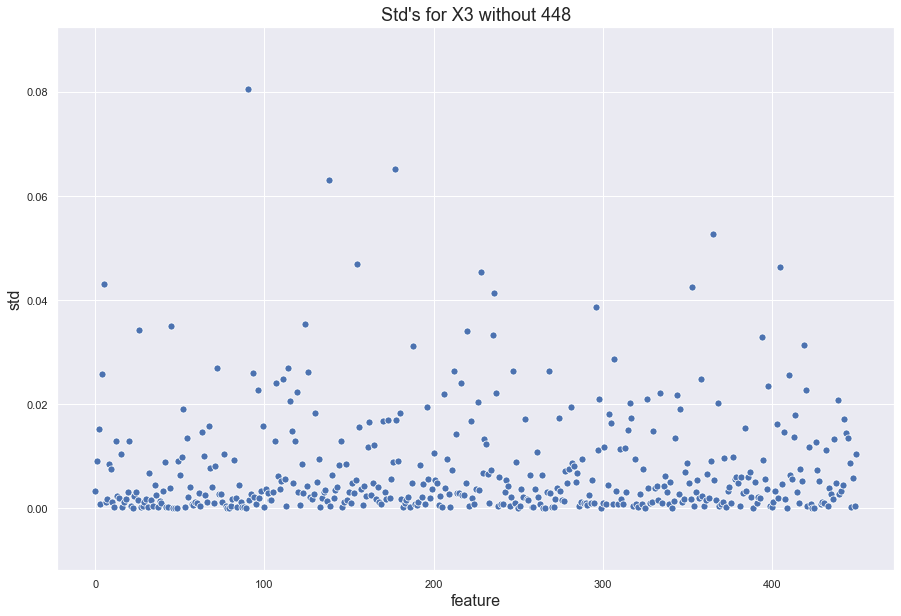

In [590]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(np.arange(len(X3_no448.iloc[:, 1:].columns)), X3_no448.iloc[:, 1:].std(), s=50, ax=ax)
ax.set_xlabel('feature', fontsize=16)
ax.set_ylabel('std', fontsize=16)
ax.set_title("Std's for X3 without 448", fontsize=18)

plt.savefig('x3_no_448_std.png', bbox_inches='tight')

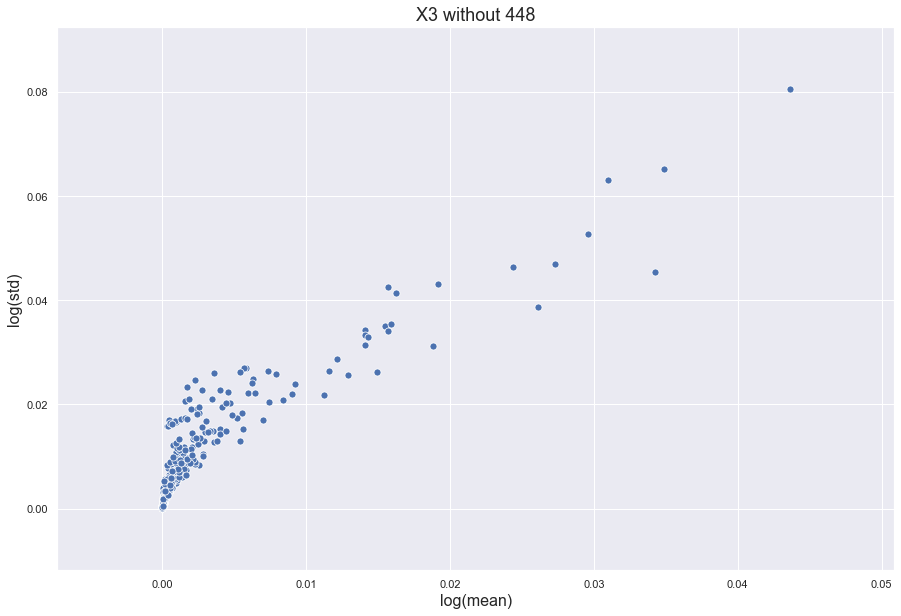

In [571]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(X3_drop_const_no448.iloc[:, 1:].mean(), X3_drop_const_no448.iloc[:, 1:].std(), s=50, ax=ax)
ax.set_xlabel('log(mean)', fontsize=16)
ax.set_ylabel('log(std)', fontsize=16)
ax.set_title("X3 without 448", fontsize=18)

plt.savefig('x3_no_448_mean_std.png', bbox_inches='tight')

In [175]:
X3_no448.iloc[:, np.where(X3_no448.iloc[:, 1:].std() == 0)[0] + 1].nunique()

23     1
266    1
410    1
426    1
dtype: int64

In [176]:
X3_test.iloc[:, np.where(X3_no448.iloc[:, 1:].std() == 0)[0] + 1].nunique()

23     4
266    2
410    2
426    2
dtype: int64

In [177]:
X3_drop_const_no448 = X3_no448.drop(['23', '266', '410', '426'], axis='columns')

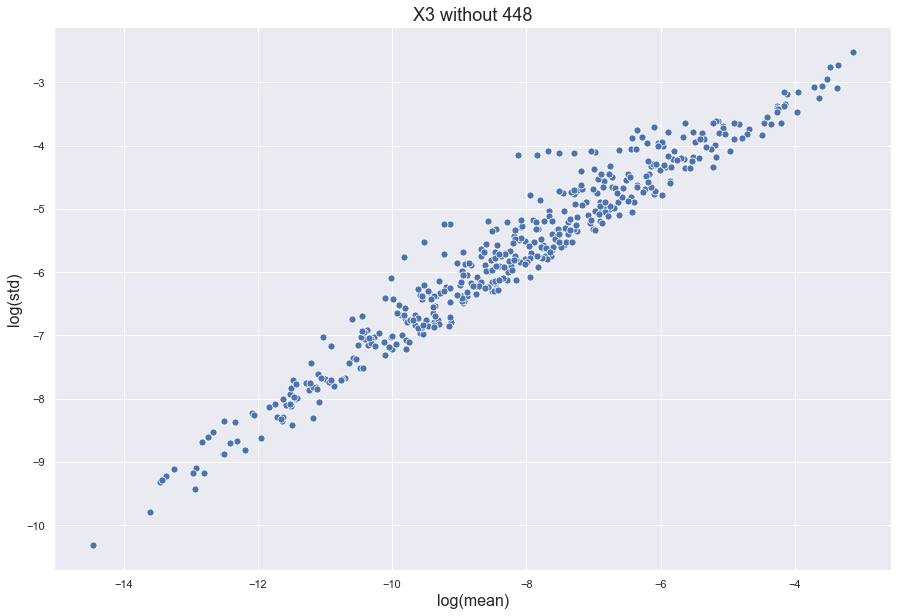

In [572]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(np.log(X3_drop_const_no448.iloc[:, 1:].mean()), np.log(X3_drop_const_no448.iloc[:, 1:].std()), s=50, ax=ax)
ax.set_xlabel('log(mean)', fontsize=16)
ax.set_ylabel('log(std)', fontsize=16)

ax.set_title("X3 without 448", fontsize=18)

plt.savefig('x3_no_448_log_mean_std.png', bbox_inches='tight')

In [227]:
from sklearn import datasets, linear_model

lr = linear_model.LinearRegression(fit_intercept=True)

lr.fit(np.array(np.log(X3_drop_const_no448.iloc[:, 1:].mean())).reshape(-1, 1), np.log(X3_drop_const_no448.iloc[:, 1:].std()))

print("Coeff = ", lr.coef_[0], ". Intercept = ", lr.intercept_)

Coeff =  0.6511601613218223 . Intercept =  -0.40322333031170476


In [234]:
1  / np.exp(lr.intercept_ * 2)

2.2399345812097633

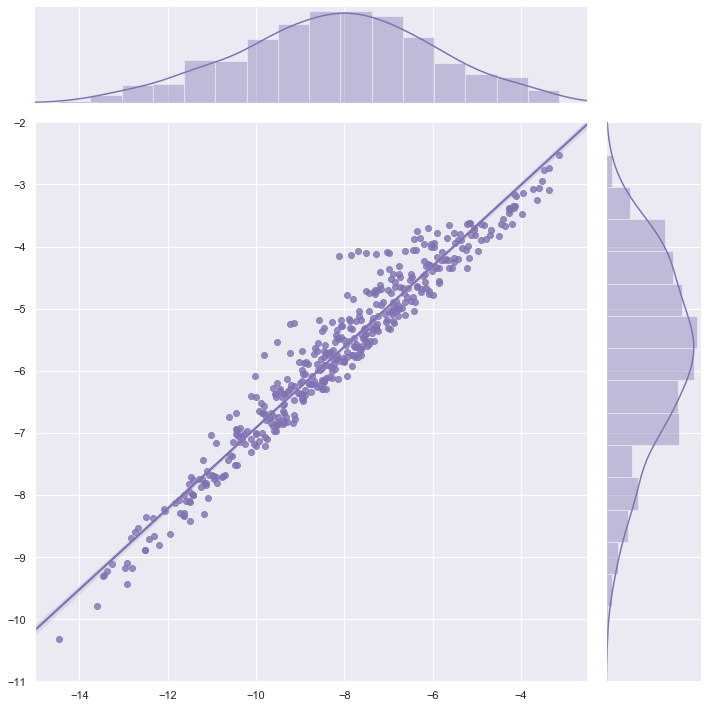

In [206]:
g = sns.jointplot(np.log(X3_drop_const_no448.iloc[:, 1:].mean()), np.log(X3_drop_const_no448.iloc[:, 1:].std()), kind="reg",
                  color="m", height=10, xlim=(-15, -2.5), ylim=(-11, -2))

Which comes down to: $\mathbb{D \xi} \simeq 2.24 * \mathbb{E \xi}^{1.3}$.

## Unique values for X3.

In [262]:
X3_no_id = X3.drop('id', axis='columns')
X3_no_id_test = X3_test.drop('id', axis='columns')

In [286]:
def edit_string(l):
    l = str(l).lstrip('[').rstrip(']').split(' ')
    l = list(filter(lambda x: x != '', l))
    l = list(map(lambda x: x.rstrip('\n')[:6], l))
    return '[' + ' '.join(l) + ']'

In [291]:
for column in X3_no_id.columns[X3_no_id.nunique() <= 8][np.argsort(X3_no_id[X3_no_id.columns[X3_no_id.nunique() <= 8]].nunique().values)]:
    unique_values, counts = np.unique(X3_no_id[column], return_counts=True)
    print("{:3} train: {:2d} {} {}".format(column, X3_no_id[column].nunique(), edit_string(unique_values), counts))
    unique_values_test, counts_test = np.unique(X3_no_id_test[column], return_counts=True)
    print("    test: {:2d} {} {}".format( X3_no_id_test[column].nunique(), edit_string(unique_values_test), counts_test))

410 train:  1 [0.] [4000]
    test:  2 [0. 0.0227] [4057    1]
23  train:  1 [0.] [4000]
    test:  4 [0. 0.0013 0.0017 0.0151] [4055    1    1    1]
266 train:  1 [0.] [4000]
    test:  2 [0. 0.0010] [4057    1]
426 train:  1 [0.] [4000]
    test:  2 [0. 0.0068] [4057    1]
12  train:  2 [0. 0.0106] [3999    1]
    test:  7 [0. 0.0020 0.0024 0.0056 0.0091 0.0172 0.02] [4051    2    1    1    1    1    1]
342 train:  2 [0. 0.0020] [3999    1]
    test:  2 [0. 0.0020] [4057    1]
90  train:  2 [0. 0.0058] [3999    1]
    test:  3 [0. 0.0030 0.0294] [4056    1    1]
88  train:  2 [0. 0.0116] [3999    1]
    test:  1 [0.] [4058]
79  train:  2 [0. 0.0062] [3999    1]
    test:  1 [0.] [4058]
48  train:  2 [0. 0.0069] [3999    1]
    test:  2 [0. 0.0131] [4057    1]
449 train:  2 [0. 0.0149] [3999    1]
    test:  3 [0. 0.0020 0.0070] [4056    1    1]
44  train:  2 [0. 0.0125] [3999    1]
    test:  1 [0.] [4058]
47  train:  2 [0. 0.0057] [3999    1]
    test:  3 [0. 0.0064 0.0526] [4056   

In [399]:
for id_val in X3[X3['251'] > 0.0]['id'].values:
    print(Y[Y['id'] == id_val])

      id  1  2  3  4  5
127  270  0  1  1  1  0
       id  1  2  3  4  5
536  1148  0  0  1  1  0
        id  1  2  3  4  5
1010  2095  0  1  0  1  1
        id  1  2  3  4  5
1423  2934  0  0  0  0  0


In [403]:
X3_unique_values, X3_counts = np.unique(X3.nunique(), return_counts=True)

In [415]:
X3.columns[X3.nunique() == 77]

Index(['172'], dtype='object')

In [416]:
np.unique(X3['172'], return_counts=True)

(array([0.        , 0.00104058, 0.00112613, 0.00135318, 0.00153374,
        0.00173913, 0.00179211, 0.00185874, 0.00189036, 0.00204499,
        0.00218341, 0.00225225, 0.00230415, 0.00238095, 0.00255754,
        0.00271003, 0.00274725, 0.0028169 , 0.00288184, 0.00292398,
        0.00294985, 0.00295858, 0.00307692, 0.00362319, 0.00367647,
        0.00381679, 0.00383142, 0.00389105, 0.00413223, 0.00425532,
        0.004329  , 0.00440529, 0.00460829, 0.00497512, 0.00505051,
        0.00534759, 0.00540541, 0.00558659, 0.00589971, 0.00595238,
        0.00628931, 0.00645161, 0.00671141, 0.00680272, 0.00684932,
        0.00694444, 0.00724638, 0.00740741, 0.00769231, 0.00819672,
        0.00847458, 0.00854701, 0.00900901, 0.00909091, 0.00952381,
        0.00990099, 0.0106383 , 0.01075269, 0.01086957, 0.01149425,
        0.01204819, 0.01234568, 0.01449275, 0.015625  , 0.01666667,
        0.01694915, 0.01785714, 0.01960784, 0.02      , 0.02325581,
        0.02631579, 0.02702703, 0.02941176, 0.03

In [404]:
X3_unique_values, X3_counts

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   22,   23,
          24,   25,   26,   27,   28,   29,   30,   31,   32,   33,   34,
          35,   36,   37,   38,   39,   40,   41,   42,   43,   44,   45,
          47,   48,   49,   50,   51,   52,   53,   54,   55,   56,   57,
          58,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
          71,   72,   73,   75,   76,   77,   78,   79,   82,   83,   84,
          85,   86,   87,   88,   92,   93,   94,   96,   97,   98,  101,
         104,  105,  106,  107,  108,  110,  111,  112,  114,  116,  117,
         118,  120,  121,  122,  123,  124,  125,  126,  127,  130,  131,
         135,  136,  137,  138,  141,  142,  145,  148,  149,  150,  152,
         154,  155,  159,  161,  162,  163,  164,  167,  168,  169,  170,
         174,  175,  176,  178,  180,  183,  186,  188,  189,  192,  193,
         196,  198,  202,  203,  207, 

## X2 analysis.

In [325]:
user_ids, counts = np.unique(X2['id'], return_counts=True)
user_ids_test, counts_test = np.unique(X2_test['id'], return_counts=True)

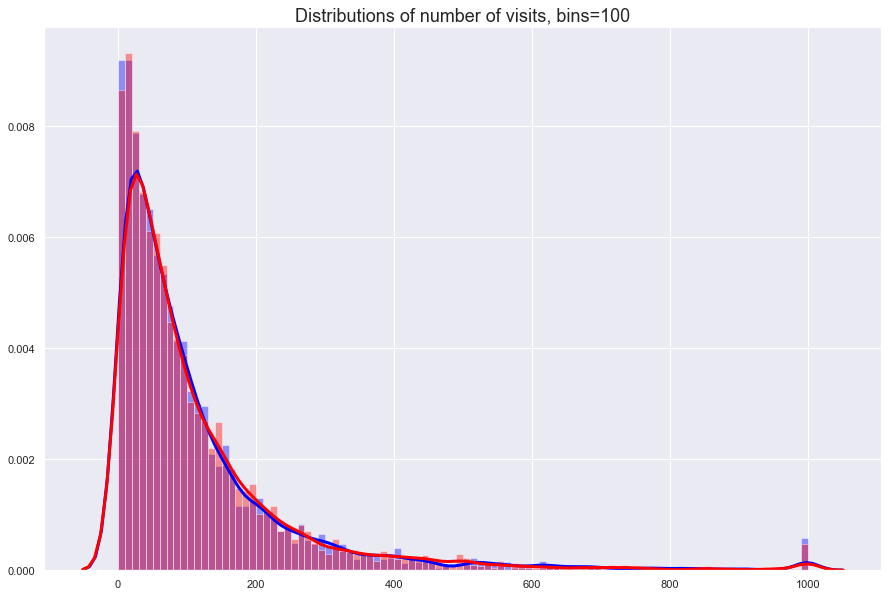

In [576]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.distplot(counts, bins=100, ax=ax, color='blue', kde_kws={'linewidth':3})
ax = sns.distplot(counts_test, bins=100, ax=ax, color='red', kde_kws={'linewidth':3})
ax.set_title('Distributions of number of visits, bins=100', fontsize=18)

plt.savefig('x2_visits_100.png', bbox_inches='tight')

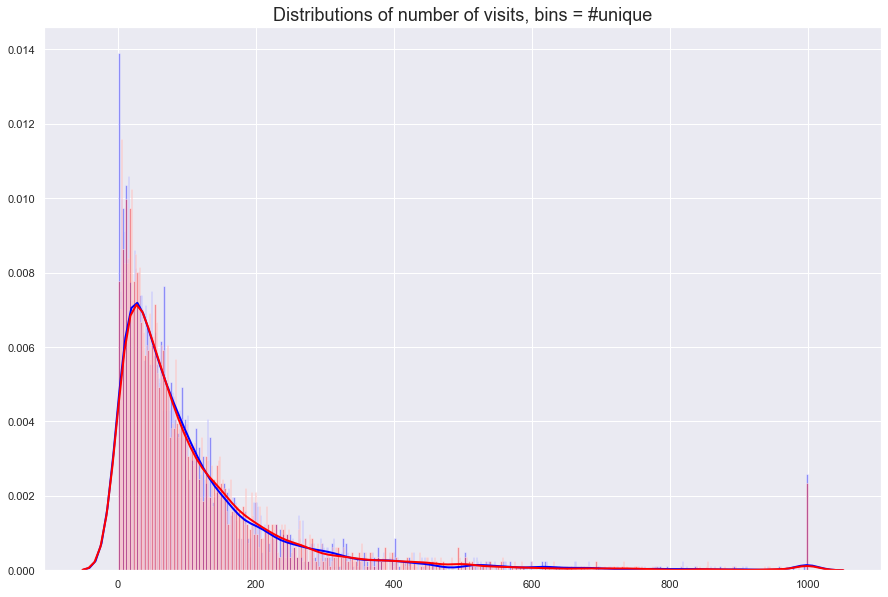

In [577]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.distplot(counts, bins=len(np.unique(counts)), ax=ax, color='blue', kde_kws={'linewidth':2})
ax = sns.distplot(counts_test, bins=len(np.unique(counts_test)), ax=ax, color='red', kde_kws={'linewidth':2})
ax.set_title('Distributions of number of visits, bins = #unique', fontsize=18)

plt.savefig('x2_visits_unique.png', bbox_inches='tight')

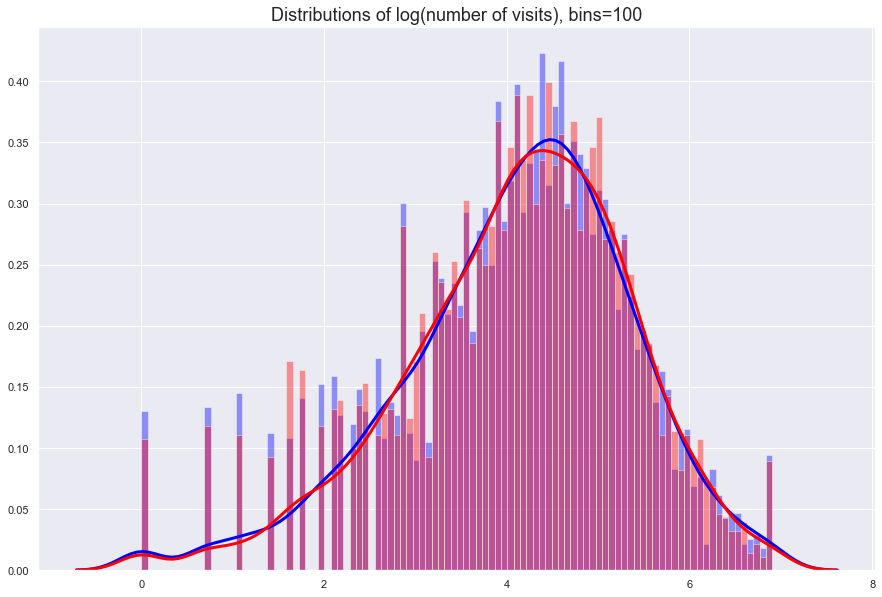

In [578]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.distplot(np.log(counts), bins=100, ax=ax, color='blue', kde_kws={'linewidth':3})
ax = sns.distplot(np.log(counts_test), bins=100, ax=ax, color='red', kde_kws={'linewidth':3})
ax.set_title('Distributions of log(number of visits), bins=100', fontsize=18)

plt.savefig('x2_log_visits_100.png', bbox_inches='tight')

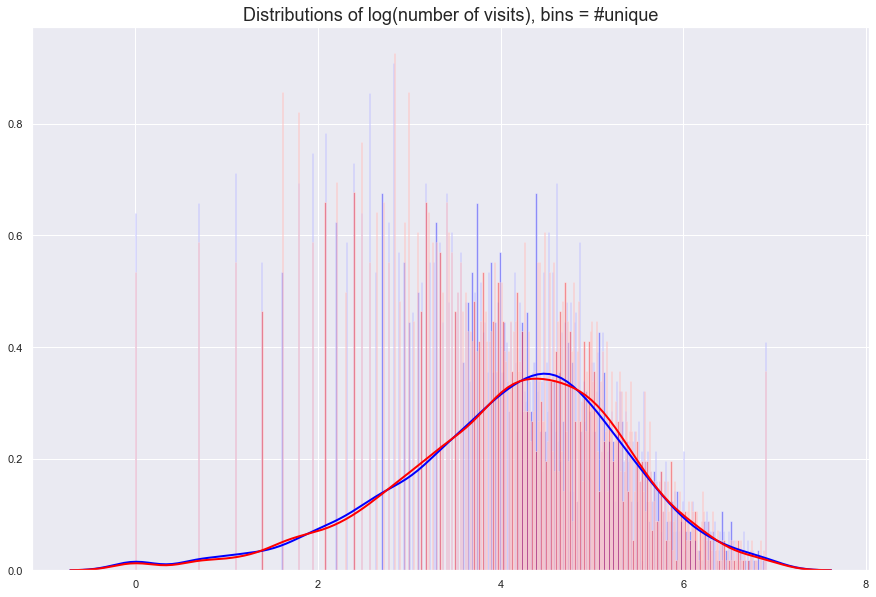

In [579]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.distplot(np.log(counts), bins=len(np.unique(counts)), ax=ax, color='blue', kde_kws={'linewidth':2})
ax = sns.distplot(np.log(counts_test), bins=len(np.unique(counts_test)), ax=ax, color='red', kde_kws={'linewidth':2})
ax.set_title('Distributions of log(number of visits), bins = #unique', fontsize=18)

plt.savefig('x2_log_visits_unique.png', bbox_inches='tight')

In [369]:
X2['A'].nunique()

134369

In [370]:
unique_urls, url_counts = np.unique(X2['A'], return_counts=True)
unique_urls_test, url_counts_test = np.unique(X2_test['A'], return_counts=True)

In [375]:
print("Top 10 most popular urls in train: ", unique_urls[np.argsort(url_counts)[::-1]][:10])
print("Times visited: ", np.sort(url_counts)[::-1][:10])

Top 10 most popular urls in train:  [52464 20263 30159 68094 15593 44123 14038 67589 21542 49258]
Times visited:  [579 555 503 435 414 413 392 392 371 368]


In [377]:
print("Top 10 most popular urls in test: ", unique_urls_test[np.argsort(url_counts_test)[::-1]][:10])
print("Times visited: ", np.sort(url_counts_test)[::-1][:10])

Top 10 most popular urls in test:  [20263 52464 30159 44123 68094 15593 14038 49258 21542 47634]
Times visited:  [584 576 526 459 442 420 404 398 397 379]


In [580]:
print("Number of urls with more than 10 views in train: ", np.where(np.sort(url_counts)[::-1] == 10)[0][0])
print("Number of urls with more than 10 views in test: ", np.where(np.sort(url_counts_test)[::-1] == 10)[0][0])

Number of urls with more than 10 views in train:  7409
Number of urls with more than 10 views in test:  7606


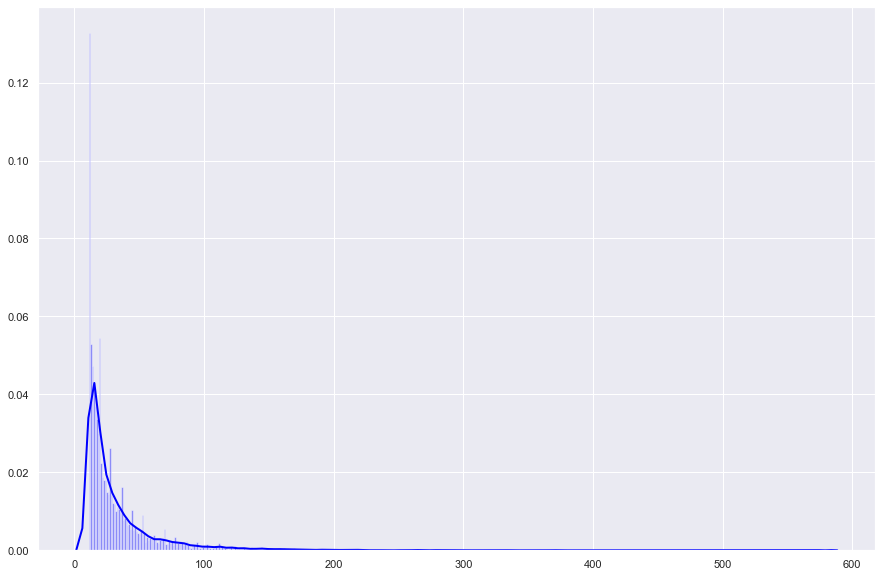

In [581]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.distplot(np.sort(url_counts)[::-1][:7409], bins=500, ax=ax, color='blue', kde_kws={'linewidth':2})

plt.savefig('x2_visited_urls_10_500.png', bbox_inches='tight')

## Target analysis

In [421]:
print("Percentage of ones for each target: ")
Y.sum(axis=0) / Y.shape[0] * 100

Percentage of ones for each target: 


id    406031.125
1         30.375
2         34.225
3         32.825
4         31.850
5         35.675
dtype: float64

In [426]:
Y1 = Y['id'][Y['1'] == 1]

In [430]:
X3_Y1 = X3[X3.id.isin(Y1)].drop('id', axis='columns')

In [445]:
for i in range(1, 6):
    Y_tmp = Y['id'][Y['{}'.format(i)] == 1]
    X3_Y_tmp = X3[X3.id.isin(Y_tmp)].drop('id', axis='columns')
    X3_Y_val, X3_Y_counts = np.unique(X3_Y_tmp.nunique(), return_counts=True)
    print("For {} class:".format(i))
    print('Number of unique values: ', X3_Y_val[np.argsort(X3_Y_counts)[::-1]][:10])
    print('Amount of features:      ', np.sort(X3_Y_counts)[::-1][:10])

For 1 class:
Number of unique values:  [ 1  2  4  3  5 10 11  6 20 16]
Amount of features:       [28 18 17 13 13 13 12 10 10  8]
For 2 class:
Number of unique values:  [ 2  3  4  5  1  6 12 14  8 10]
Amount of features:       [21 17 16 15 14 12 11 10  8  8]
For 3 class:
Number of unique values:  [ 2  4  1  7  3  5  6  9 10  8]
Amount of features:       [23 21 16 16 15 13 10 10 10  9]
For 4 class:
Number of unique values:  [ 2  4  1  5 10  8  6  3  7 15]
Amount of features:       [24 21 20 13 11 11  9  9  8  8]
For 5 class:
Number of unique values:  [ 2  1  4  5  6 10  3 14 11 13]
Amount of features:       [21 18 16 14 13 10 10 10  9  8]


## Test importances.

In [448]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [417]:
def cross_validation_score_statement(estimator,
                                     X,
                                     y,
                                     scoring,
                                     n_splits=5,
                                     statement=None,
                                     random_state=0):
    """
    Evaluate a score by cross-validation. 
    The fit method will be performed on the entire train subset at each iteration,
    the predict method and scoring will be performed only for objects from test subset where statement is True
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit' and 'predict'
        The object to use to fit the data.
    X : pandas.DataFrame
        The data to fit.
    y : pandas.Series
        The target variable to try to predict.
    scoring : callable 
        The scoring function of signature scoring(y_true,y_pred).
    statement : boolean numpy.array of shape equal to y.shape
        The mask showing the objects we want to evaluate estimator on.
    n_splits : int
        Number of folds for cross-validation
    random_state : int
        Random_state for KFold and StratifiedKFold    
    
    Returns
    -----------
    scores : array of float, shape=(n_splits,)
    
    """
    if statement is None:
        cv = KFold(n_splits=n_splits, shuffle=False, random_state=random_state)
        cv_iter = list(cv.split(X, y))
    else:
        cv = StratifiedKFold(n_splits=n_splits,
                             shuffle=True,
                             random_state=random_state)
        cv_iter = list(cv.split(X, statement))
    scores = []

    for train, test in cv_iter:
        estimator.fit(X.iloc[train, :].values, y.iloc[train].values)
        if statement is not None:
            y_statement = y.iloc[test].loc[statement[test]]
            pred_statement = estimator.predict_proba(
                X.iloc[test, :].loc[statement[test]].values)[:, 1]
        else:
            y_statement = y.iloc[test]
            pred_statement = estimator.predict_proba(X.iloc[test, :].values)[:, 1]
        scores.append(scoring(y_statement, pred_statement))
    return np.array(scores)

In [599]:
rf = RandomForestClassifier(n_estimators=600)
score = roc_auc_score

In [600]:
X1_no_id = X1.drop('id', axis='columns')

In [601]:
colors = (X1_no_id.dtypes == 'int64')
colors[colors == True] = 'blue'
colors[colors == False] = 'red'
colors = colors.values

## X1 only.

Mean score 0.569


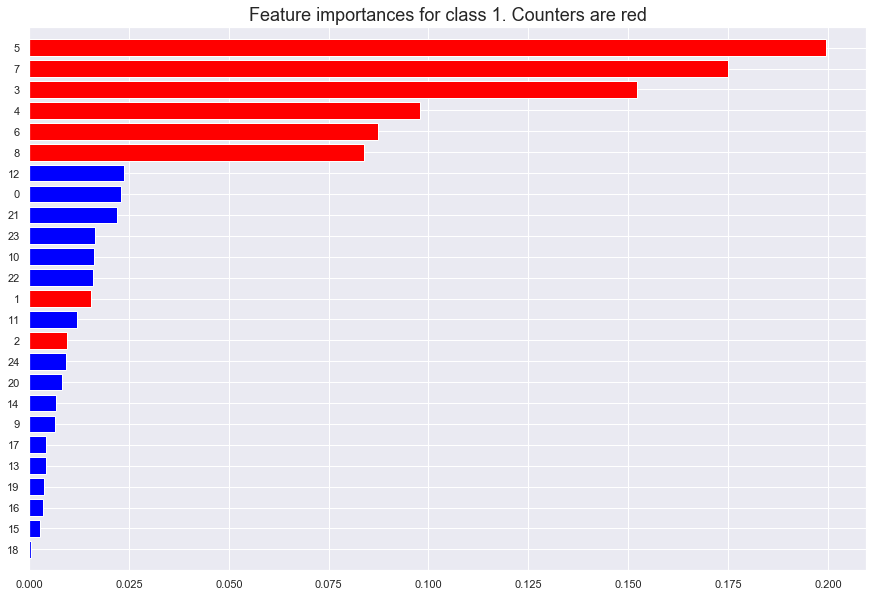

Mean score 0.544


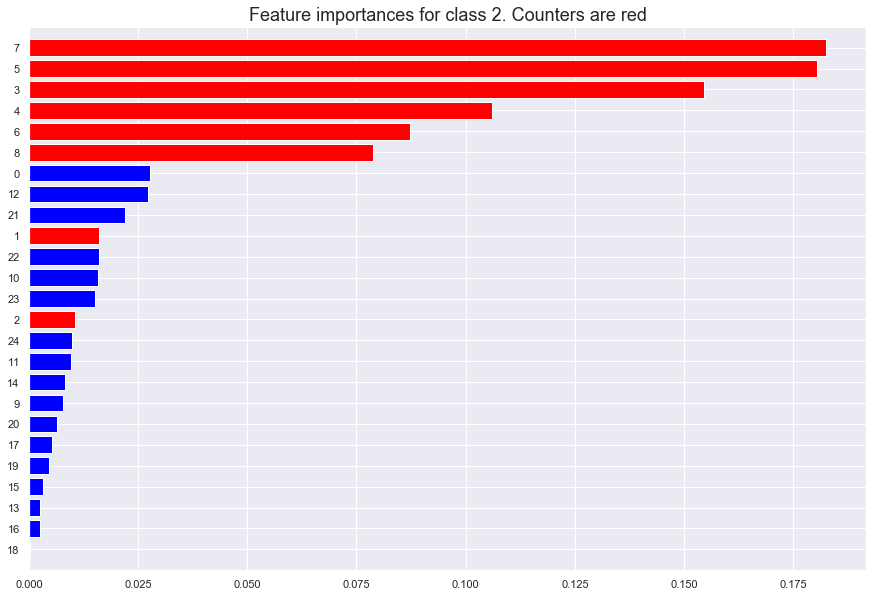

Mean score 0.583


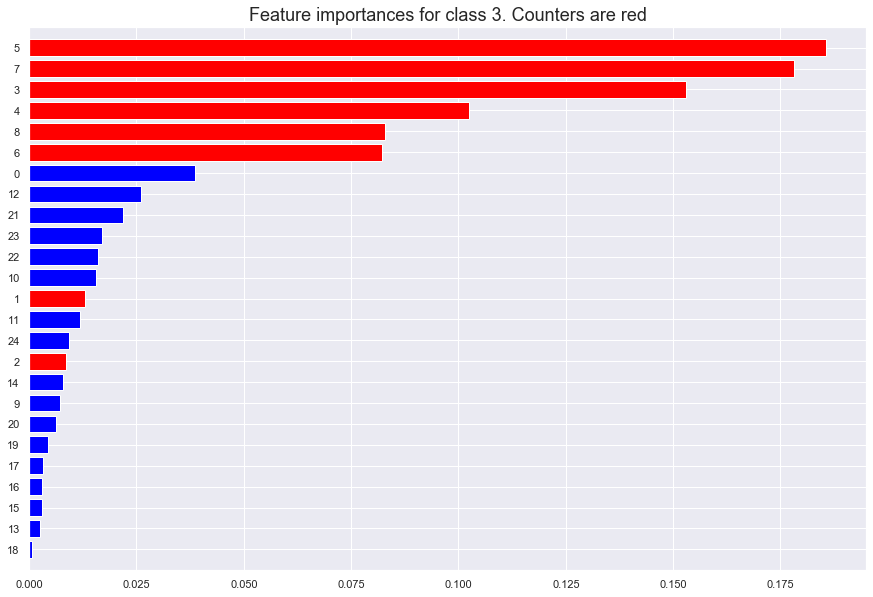

Mean score 0.561


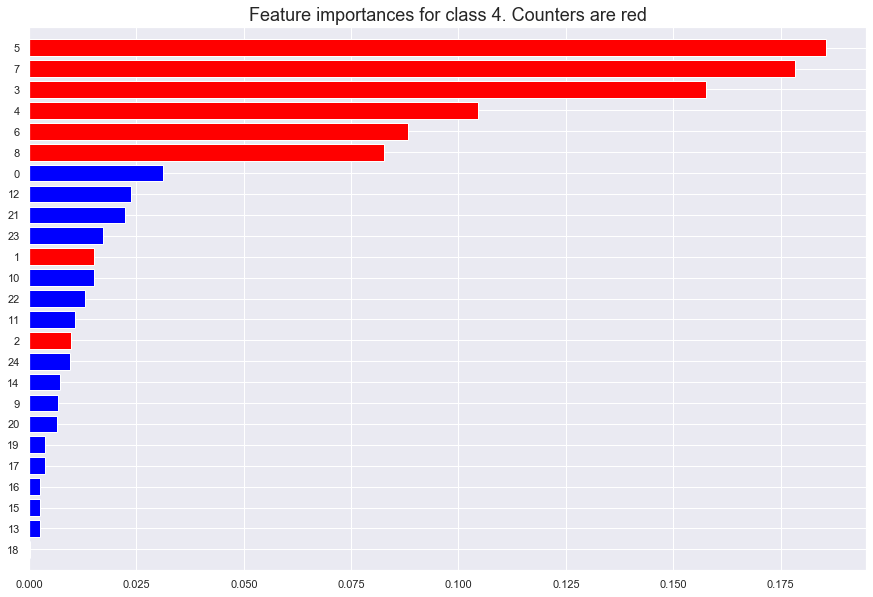

Mean score 0.551


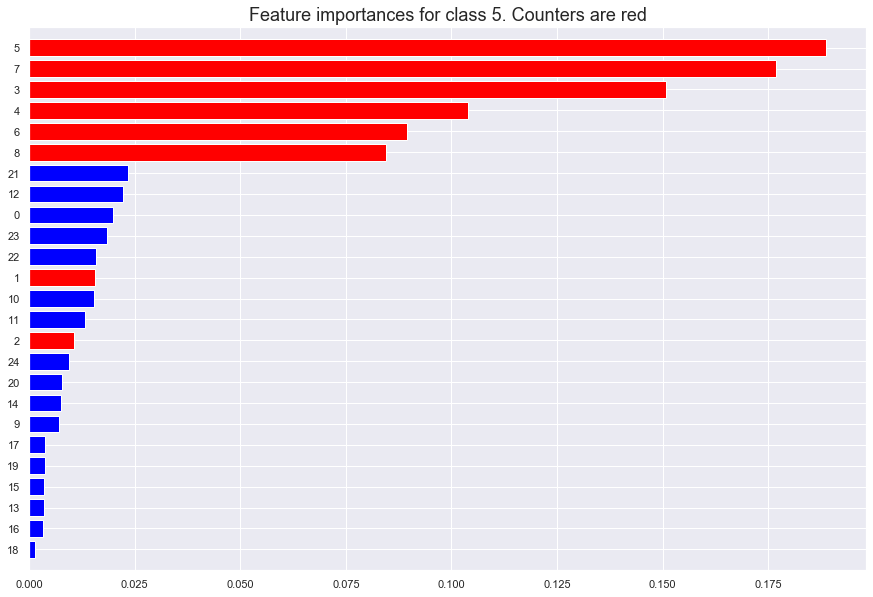

Mean ROC-AUC: 0.5614


In [602]:
auc_scores = []

for i in range(1, 6):
    rf = RandomForestClassifier(n_estimators=300)
    scores = cross_validation_score_statement(estimator=rf, X=X1_no_id, y=Y['{}'.format(i)], scoring=score)
    print("Mean score {:.3f}".format(scores.mean()))
    auc_scores.append(scores.mean())
    
    importances = rf.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(15, 10))
    plt.title("Feature importances for class {}. Counters are red".format(i), fontsize=18)
    plt.barh(range(X1_no_id.shape[1]), rf.feature_importances_[indices],
           color=colors[indices], align="center")
    # If you want to define your own labels,
    # change indices to a list of labels on the following line.
    plt.yticks(range(X1_no_id.shape[1]), indices)
    plt.ylim([-1, X1_no_id.shape[1]])
    
    plt.savefig('x1_rf_imp_{}.png'.format(i), bbox_inches='tight')
    plt.show()
    
print("Mean ROC-AUC: {:.4f}".format(np.array(auc_scores).mean()))

In [603]:
for i, c_score in enumerate(auc_scores):
    print("Score for class {} = {:.3f}".format(i, c_score))

Score for class 0 = 0.569
Score for class 1 = 0.544
Score for class 2 = 0.583
Score for class 3 = 0.561
Score for class 4 = 0.551


## X3 only.

Mean score 0.497


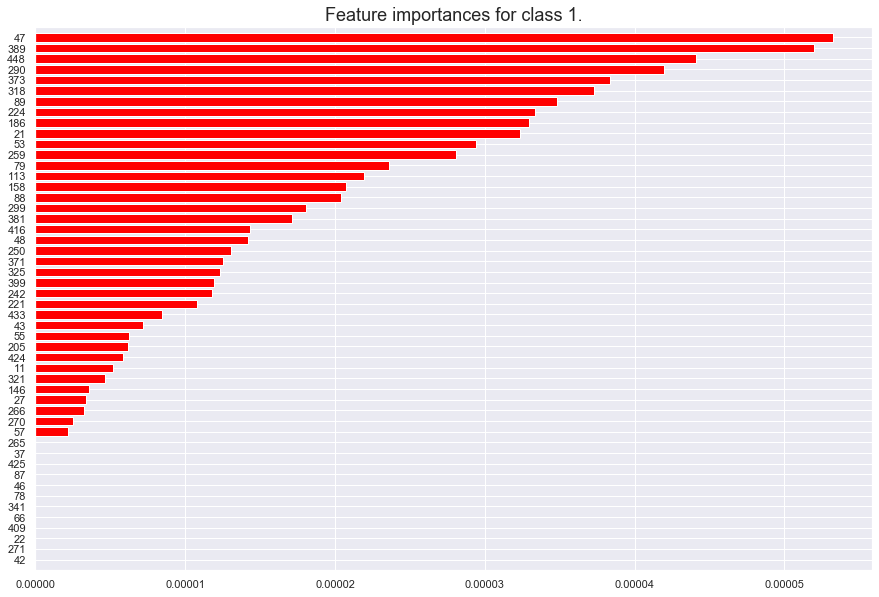

Mean score 0.518


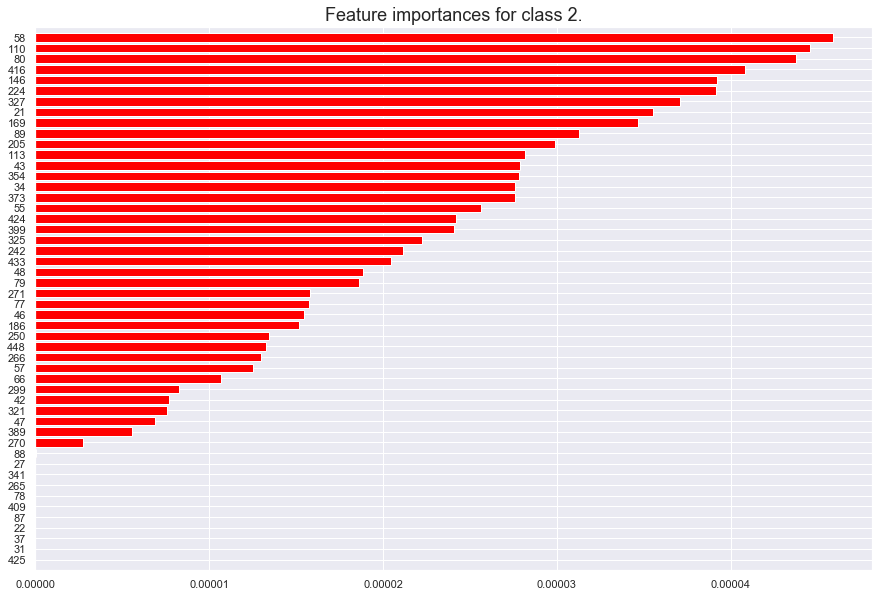

Mean score 0.507


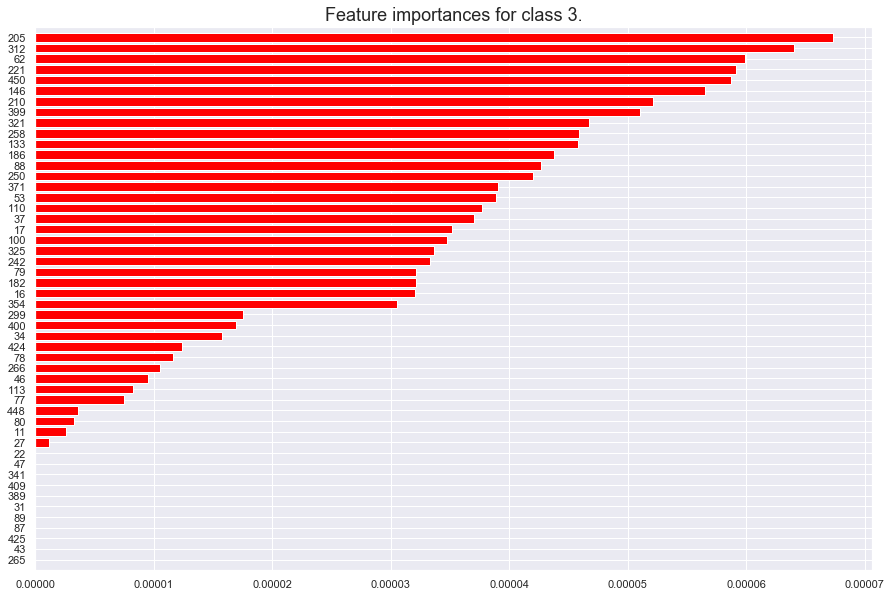

Mean score 0.494


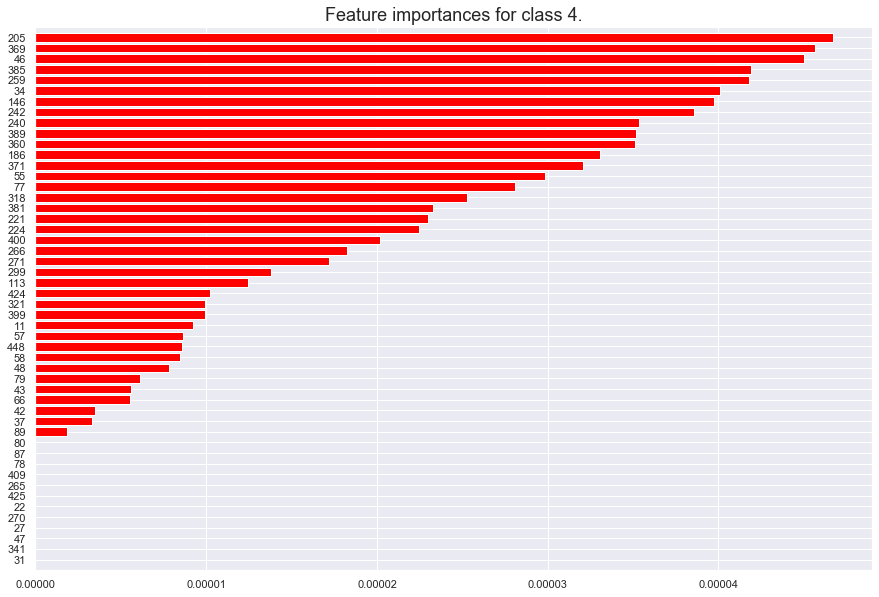

Mean score 0.508


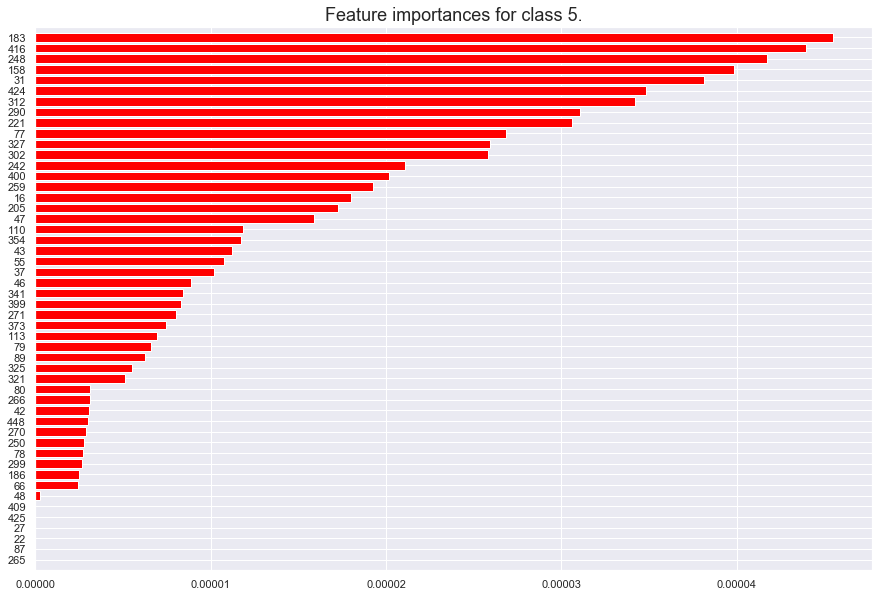

Mean ROC-AUC: 0.5049


In [604]:
auc_scores = []

for i in range(1, 6):
    rf = RandomForestClassifier(n_estimators=400)
    scores = cross_validation_score_statement(estimator=rf, X=X3_no_id, y=Y['{}'.format(i)], scoring=score)
    print("Mean score {:.3f}".format(scores.mean()))
    auc_scores.append(scores.mean())
    
    importances = rf.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(15, 10))
    plt.title("Feature importances for class {}.".format(i), fontsize=18)
    plt.barh(range(50), rf.feature_importances_[indices][:50],
           color='red', align="center")
    # If you want to define your own labels,
    # change indices to a list of labels on the following line.
    plt.yticks(range(50), indices[:50])
    plt.ylim([-1, 50])
    
    plt.savefig('x3_rf_imp_{}.png'.format(i), bbox_inches='tight')
    plt.show()
    
print("Mean ROC-AUC: {:.4f}".format(np.array(auc_scores).mean()))

In [605]:
for i, c_score in enumerate(auc_scores):
    print("Score for class {} = {:.3f}".format(i, c_score))

Score for class 0 = 0.497
Score for class 1 = 0.518
Score for class 2 = 0.507
Score for class 3 = 0.494
Score for class 4 = 0.508


## X1 + url counter.

In [584]:
X2_user_ids, X2_counts = np.unique(X2['id'], return_counts=True)

In [585]:
url_count = np.hstack((X2_user_ids.reshape(-1, 1), X2_counts.reshape(-1, 1)))
url_count_df = pd.DataFrame(data=url_count, columns=['id', 'counter'])

In [586]:
X1_url_counter = X1.merge(url_count_df, on='id', how='inner')

In [587]:
colors = np.hstack((colors, np.array('green')))

In [588]:
X1_url_counter_no_id = X1_url_counter.drop('id', axis='columns')

Mean score 0.576


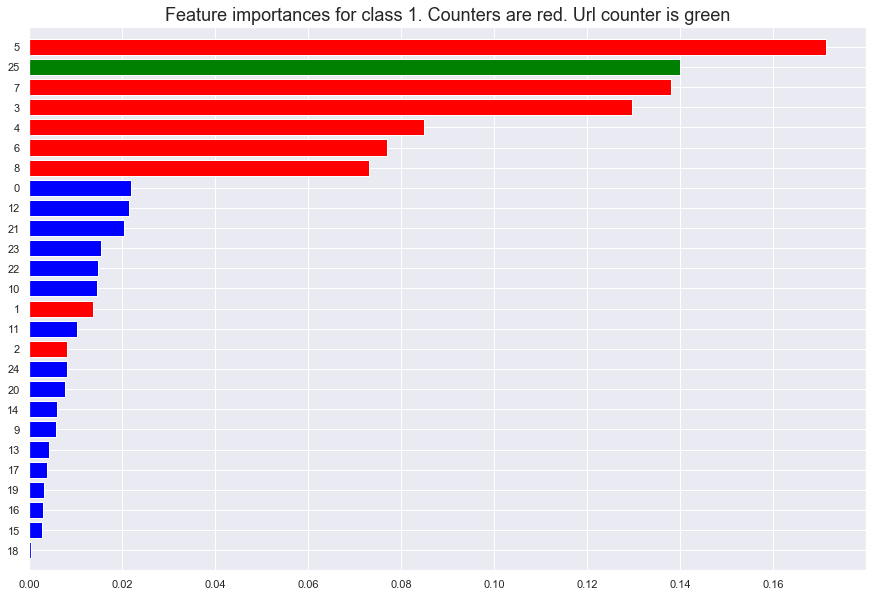

Mean score 0.550


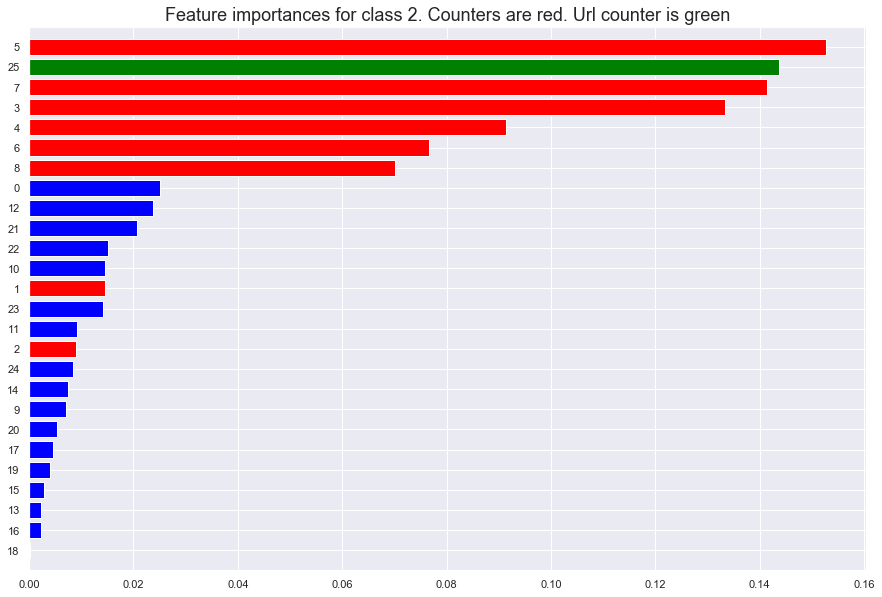

Mean score 0.580


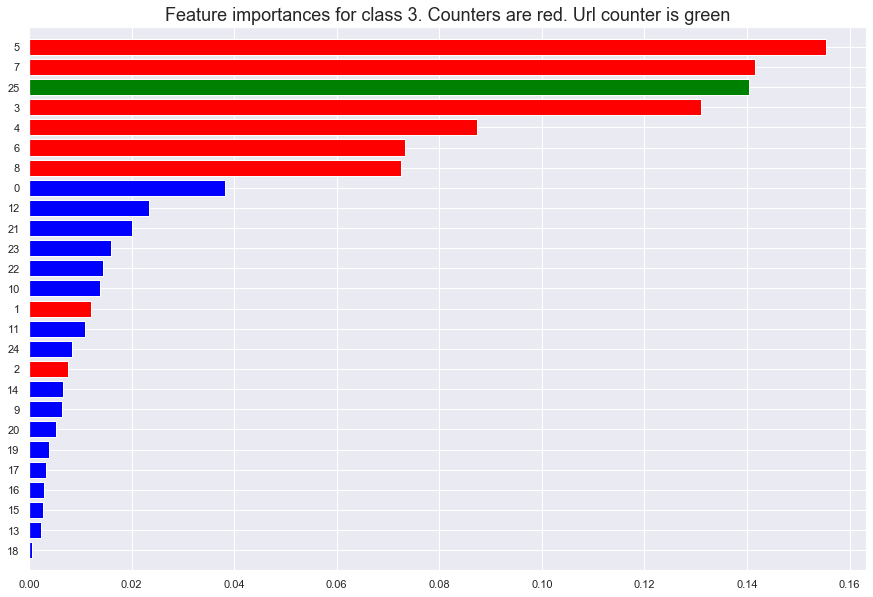

Mean score 0.562


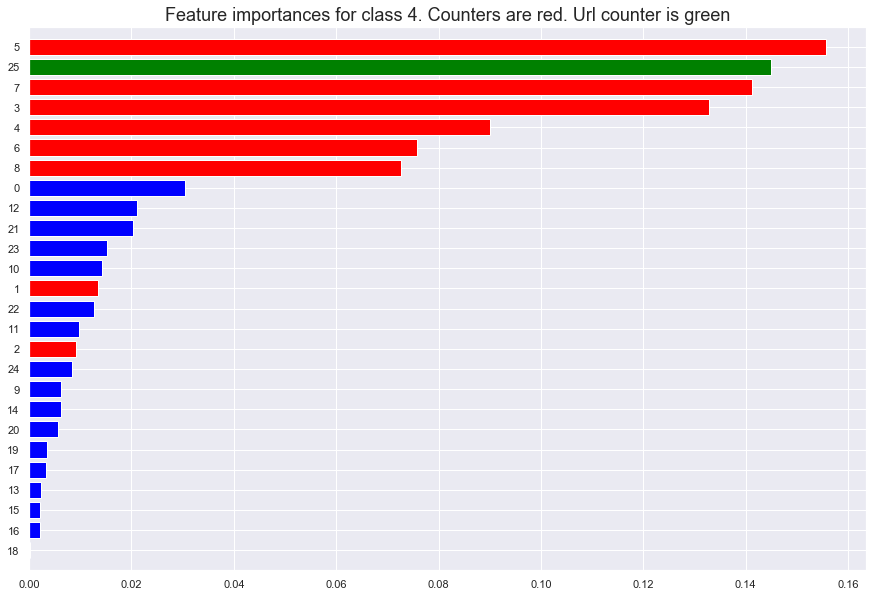

Mean score 0.542


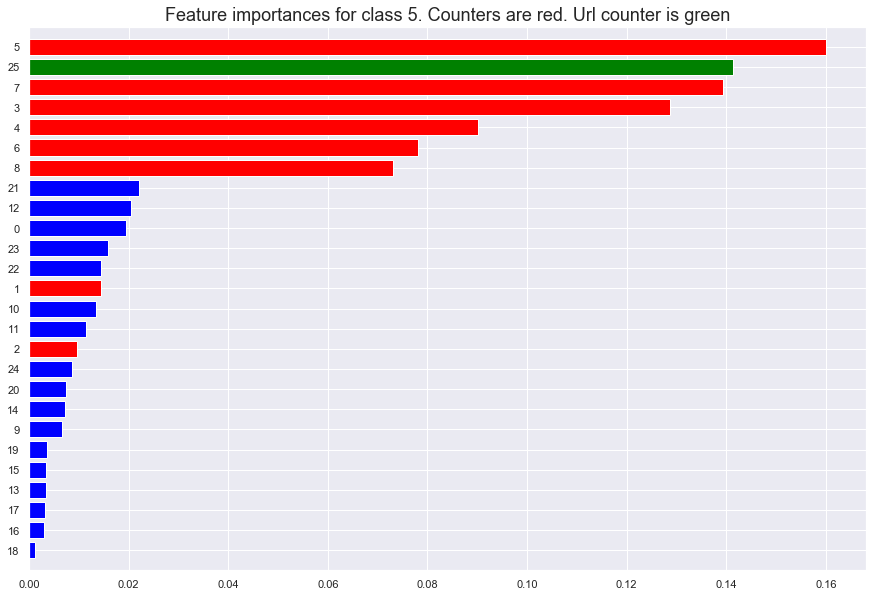

Mean ROC-AUC: 0.5621


In [593]:
auc_scores = []

for i in range(1, 6):
    rf = RandomForestClassifier(n_estimators=600)
    scores = cross_validation_score_statement(estimator=rf, X=X1_url_counter_no_id, y=Y['{}'.format(i)], scoring=score)
    print("Mean score {:.3f}".format(scores.mean()))
    auc_scores.append(scores.mean())
    
    importances = rf.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(15, 10))
    plt.title("Feature importances for class {}. Counters are red. Url counter is green".format(i), fontsize=18)
    plt.barh(range(X1_url_counter_no_id.shape[1]), rf.feature_importances_[indices],
           color=colors[indices], align="center")
    # If you want to define your own labels,
    # change indices to a list of labels on the following line.
    plt.yticks(range(X1_url_counter_no_id.shape[1]), indices)
    plt.ylim([-1, X1_url_counter_no_id.shape[1]])
    
    plt.savefig('x1_url_counter_rf_imp_{}.png'.format(i), bbox_inches='tight')
    plt.show()
    
print("Mean ROC-AUC: {:.4f}".format(np.array(auc_scores).mean()))

In [597]:
for i, score in enumerate(auc_scores):
    print("Score for class {} = {:.3f}".format(i, score))

Score for class 0 = 0.576
Score for class 1 = 0.550
Score for class 2 = 0.580
Score for class 3 = 0.562
Score for class 4 = 0.542
